# KNN Classification

## Importing the libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [60]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [61]:
df.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [62]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

##Data Visualization

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

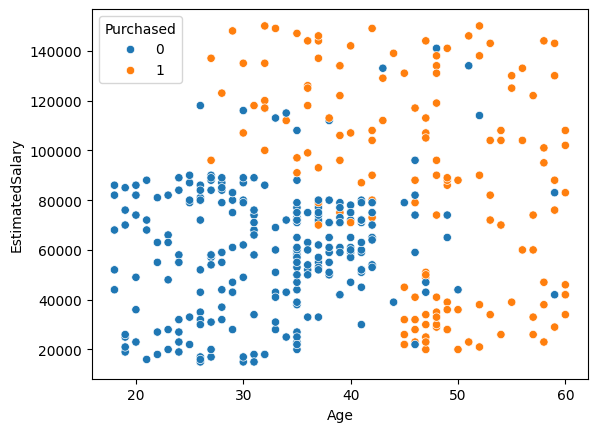

In [63]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

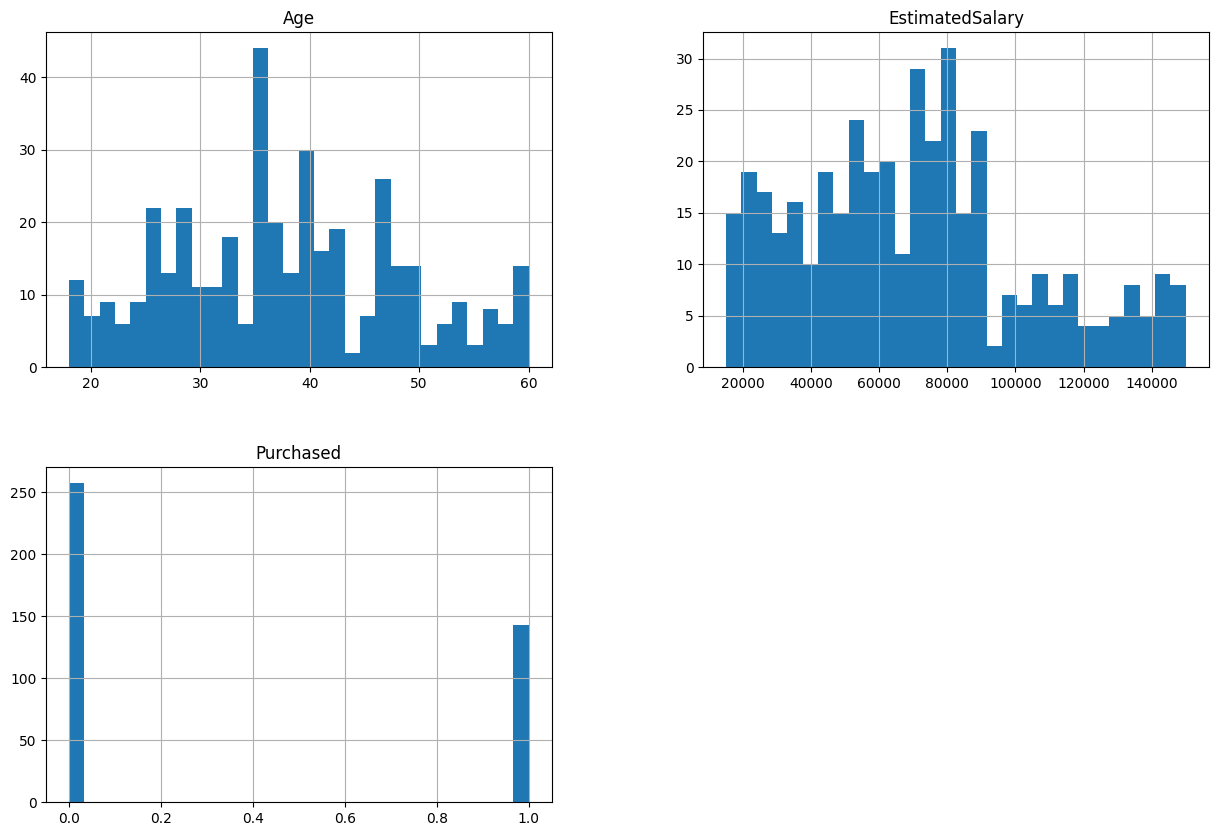

In [64]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

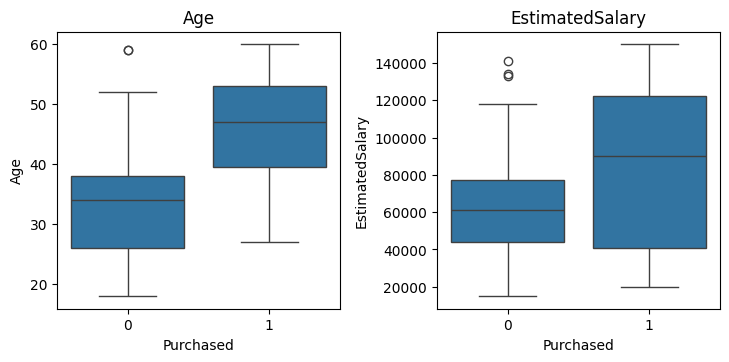

In [65]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Purchased', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

##MultiCollinearity Analysis and Fixation

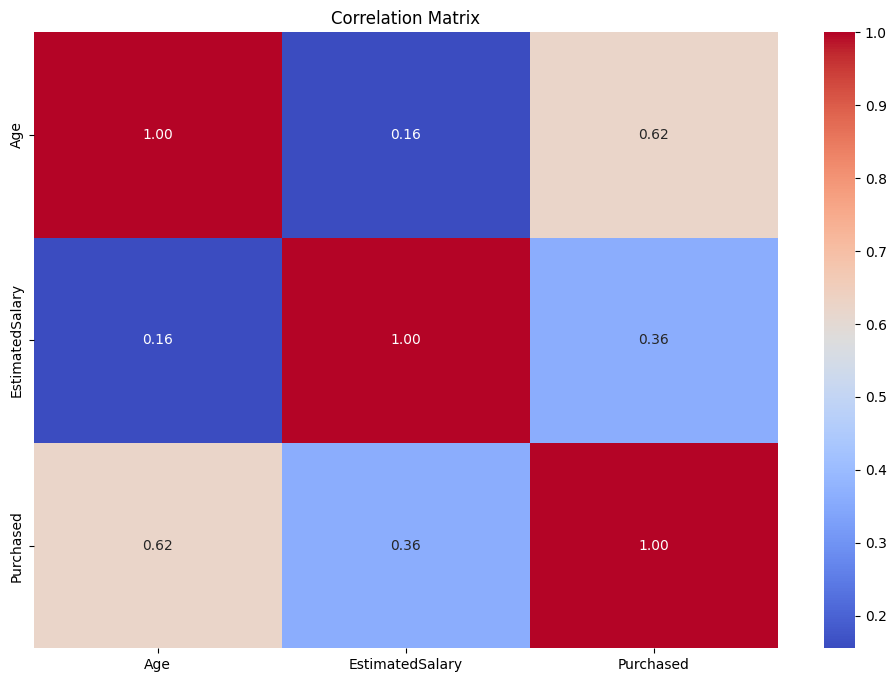

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [67]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [68]:
X[0]

array([   19, 19000])

## Splitting the dataset into the Training set and Test set

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the KNN Classification model on the Training set

In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', p=2, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

##Hyperparameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9}


## Predicting the Test set results

In [73]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[:10])
#This prints results of first ten observations side by side. Left Side is the Predicted Class and Right Side is Actual Class

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]]


##Plotting Decision Boundary

<ipython-input-74-da4abd51b5ee>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)


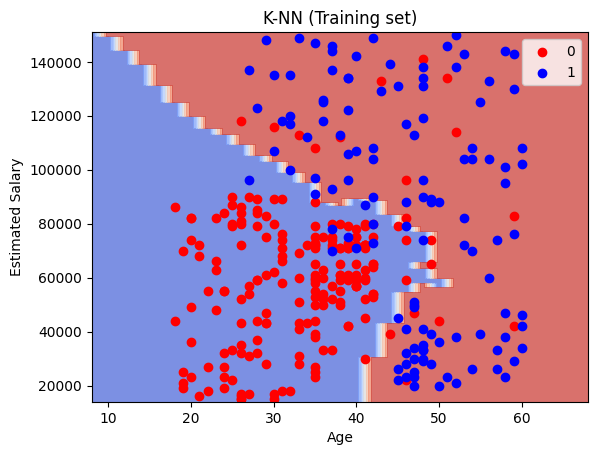

In [74]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 2),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 2))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = 'coolwarm')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-75-6adbc6327dba>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)


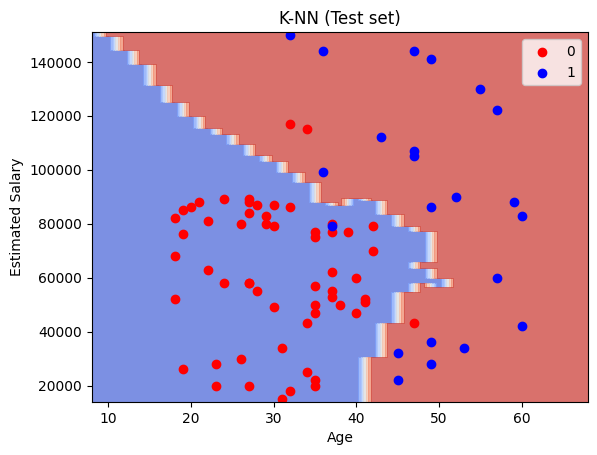

In [75]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 2),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 2))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = 'coolwarm')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Making the Confusion Matrix

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_test, y_pred) #normalize= 'pred' can be used to see accuracy for each class
print(cf)

[[55  3]
 [ 1 21]]


In [77]:
cf = confusion_matrix(y_test, y_pred, normalize='pred')
print(cf)

[[0.98214286 0.125     ]
 [0.01785714 0.875     ]]


In [78]:
y_pred_train=classifier.predict(X_train)

In [79]:
print(accuracy_score(y_test,y_pred)) #accuracy on test set

0.95


In [80]:
print(accuracy_score(y_train,y_pred_train)) #accuracy on Training Set

0.9125


##Plotting ROC Curve

In [81]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1] #This returns Predicted probabilities for each row

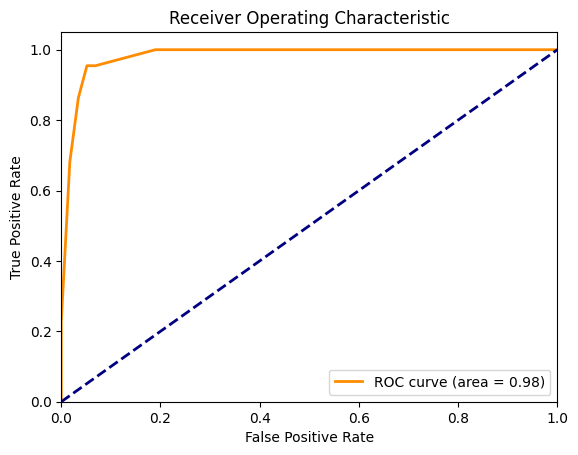

In [82]:
from sklearn.metrics import roc_curve, auc

# Assuming `y_test` and `y_pred_proba` are your true labels and predicted probabilities
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

ROC curve has AUC(area under curve) equal to .99 which is very good for classification

##Classification Report to Observe Overfitting

In [83]:
from sklearn.metrics import classification_report

# Evaluate on training set
y_train_pred_proba = classifier.predict_proba(X_train)[:, 1]
print('Training Set Classification Report:')
print(classification_report(y_train, classifier.predict(X_train)))

# Evaluate on test set
y_test_pred = classifier.predict(X_test)
print('Test Set Classification Report:')
print(classification_report(y_test, y_test_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       199
           1       0.86      0.92      0.89       121

    accuracy                           0.91       320
   macro avg       0.90      0.91      0.91       320
weighted avg       0.91      0.91      0.91       320

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



The Accuracy on Test Set (90%) and Training Set (93%) suggest that there is less overfitting since the difference between accuracy scores is very very less.

## Computing the accuracy with k-Fold Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.62 %
Standard Deviation: 5.23 %
